In [1]:
import networkx as nx
import pylab as p
import matplotlib.pyplot as plt

#%matplotlib inline
#%config InlineBackend.close_figures=False # keep figures open in pyplot

# Data

## Genomes

In [2]:
genomes = {"verte":
                "ATGCCTTGGACACGTAGCTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACATGCATGCATCGATCGAAATGCCTAGCTAAAGCTAAAGCTTAGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCTAGCTTTCGTTTATTCGATTCGATT",
            "bleue":
                "TGACACAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA",
            "jaune":
                "TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC"
            }

## Reads

In [3]:
reads_bleue = ["TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT",
                "ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC",
                "AATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCT",
                "CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC",
                "TCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCC",
                "AGCCATAAACGATCCCGTAGCATGCCATGCATCCAGTCAG",
                "CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT",
                "AGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTA",
                "CTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAA",
                "ATCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATC",
                "TGACACAGTCCCTAAACGGGCTAGCTAACGTACCGATCGA",
                "GTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA"]

reads_verte = [ "ATGCCTTGGACACGTAGCTAGCTAAGCTAGCCCCTAAGCT",
                "CAGTTAGGTACATGCATGCATCGATCGAAATGCCTAGCTA",
                "AGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGACTC",
                "GGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCTAGCTT",
                "CCCGGGGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCT",
                "CTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACATG",
                "ATGCATGCATCGATCGAAATGCCTAGCTAAAGCTAAAGCT",
                "TAGCTAAAGCTAAAGCTTAGGATCTGACCAAGTCCCCGGG",
                "CAAGTCCCCGGGGTAGCTAGCAGTCGACTCGATCGATCGT",
                "TTAGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGAC",
                "AGCTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACA",
                "GATCGATCGTTAGCCTAGCTTTCGTTTATTCGATTCGATT"]

reads_jaune = [ "TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGAT",
                "CGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGG",
                "ATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCT",
                "GATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCT",
                "AGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAG",
                "AGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTA",
                "TCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATT",
                "GATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGC",
                "ATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTA",
                "CGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTT",
                "ATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGG",
                "CTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC"]

metagenome_reads = reads_bleue + reads_verte + reads_jaune

In [114]:
reads_bleue_named = { "B1":"TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT",
                "B2":"ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC",
                "B3":"AATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCT",
                "B4":"CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC",
                "B5":"TCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCC",
                "B6":"AGCCATAAACGATCCCGTAGCATGCCATGCATCCAGTCAG",
                "B7":"CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT",
                "B8":"AGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTA",
                "B9":"CTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAA",
                "B10":"ATCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATC",
                "B11":"TGACACAGTCCCTAAACGGGCTAGCTAACGTACCGATCGA",
                "B12":"GTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA"}

reads_verte_named = { "V1":"ATGCCTTGGACACGTAGCTAGCTAAGCTAGCCCCTAAGCT",
                "V2":"CAGTTAGGTACATGCATGCATCGATCGAAATGCCTAGCTA",
                "V3":"AGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGACTC",
                "V4":"GGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCTAGCTT",
                "V5":"CCCGGGGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCT",
                "V6":"CTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACATG",
                "V7":"ATGCATGCATCGATCGAAATGCCTAGCTAAAGCTAAAGCT",
                "V8":"TAGCTAAAGCTAAAGCTTAGGATCTGACCAAGTCCCCGGG",
                "V9":"CAAGTCCCCGGGGTAGCTAGCAGTCGACTCGATCGATCGT",
                "V10":"TTAGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGAC",
                "V11":"AGCTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACA",
                "V12":"GATCGATCGTTAGCCTAGCTTTCGTTTATTCGATTCGATT"}

reads_jaune_named = { "J1":"TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGAT",
                "J2":"CGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGG",
                "J3":"ATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCT",
                "J4":"GATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCT",
                "J5":"AGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAG",
                "J6":"AGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTA",
                "J7":"TCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATT",
                "J8":"GATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGC",
                "J9":"ATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTA",
                "J10":"CGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTT",
                "J11":"ATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGG",
                "J12":"CTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC"}

# create a dict with all reads
metagenome_reads_named = reads_bleue_named.copy()
metagenome_reads_named.update(reads_verte_named)
metagenome_reads_named.update(reads_jaune_named)


# Assembly

## First method - Greedy assembly

In [115]:
# FIRST METHOD - Greedy Assembly

# we'll work with a list of reads that we'll modify with grouped reads as soon as we are able to assemble them
current_assembly = reads_bleue.copy()
stop = False
index_read = 0
# we'll create a list of reads that have already been tested
tested_reads = []
while stop == False:
    # we'll loop over all reads or assembled reads that we have i our assembly
    read = current_assembly[index_read]
    if read in tested_reads:
        # we'll stop if the read has already been tested
        stop = True
    else:
        tested_reads.append(read)
    print(f"current_assembly - {current_assembly}")
    print(f"tested_reads - {tested_reads}")
    print(f"{len(current_assembly)} reads/contigs, current read: {read}") #i: {i} - 
    size_read = len(read)
    size_suffix = size_read
    # we have a boolean to know if we have found a read that we can assemble with the current read
    found = False
    current_assembly.pop(index_read)
    while size_suffix > 5: # we consider that a read superimposition to another that is less than 5 bp is not relevant for assembly
        suffix = read[-size_suffix:] # the suffix of the current read we'll look for as prefix of another read
        for read2 in current_assembly: # loop over all reads/assembled reads in the assembly
            if read2.startswith(suffix):
                assembled_read = read + read2[size_suffix:]
                current_assembly.append(assembled_read)
                current_assembly.remove(read2)
                print(f"read 1: {read}, read 2: {read2} - suffix of size {str(size_suffix)}: {suffix} - assembled read: {assembled_read}") 
                found = True
                break
        if found == True:
            break
        else:
            # we'll try with a smaller suffix
            size_suffix -= 1
    if found == False:
        # we were never able to assemble the current read with another read, so we'll add it back to the assembly although it won't be tested anymore
        current_assembly.append(read)


current_assembly - ['TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT', 'ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC', 'AATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCT', 'CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC', 'TCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCC', 'AGCCATAAACGATCCCGTAGCATGCCATGCATCCAGTCAG', 'CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT', 'AGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTA', 'CTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAA', 'ATCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATC', 'TGACACAGTCCCTAAACGGGCTAGCTAACGTACCGATCGA', 'GTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA']
tested_reads - ['TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT']
12 reads/contigs, current read: TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT
read 1: TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT, read 2: CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT - suffix of size 7: CTAGCCT - assembled read: TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT
current_assembly - ['ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC', 'AATCCGTACGATTTAGCGTACGATCCTTCCAATTA

## Second method - Overlap Graph

### Test the method with one bacterium

In [116]:
def assembly_graph(reads_dict, min_overlap = 5):
    """Creates an assembly graph from a dict of reads,
    using the overlap between reads. Only overlaps of 
    more than min_overlap base pairs are considered.
    Args:
        dict: a dictionary of reads with read ids as keys and reads as values
    Returns:
        NetworkX graph: A graph with reads as nodes and adges connecting overlapping nodes
    """
    # create a graph
    G = nx.DiGraph()
    # add nodes
    for id_read in reads_dict:
        G.add_node(id_read)
    # add edges between two reads by looking for the longest 
    # suffix of one read that is a prefix of another read
    # ignoring the matches of less than 5 bp
    for id_read1 in reads_dict:
        # pick one read
        read1 = reads_dict[id_read1]
        for id_read2 in reads_dict:
            # loop over all reads
            if id_read1 != id_read2:
                read2 = reads_dict[id_read2]
                longest_match = 0 
                # https://stackoverflow.com/questions/57794780/look-if-a-string-starts-with-the-ending-characters-of-another-string
                for i in range(1, min(len(read1), len(read2))):
                    # looping over all suffix sizes
                    if read1[-i:] == read2[:i]:
                        longest_match = i
                if longest_match > min_overlap:
                    print(f"read 1: '{id_read1}' ({read1}), read 2: '{id_read2}' ({read2}) - suffix of size {str(longest_match)}: {read1[-longest_match:]}")
                    G.add_edge(id_read1, id_read2, weight=longest_match)
    return G



In [117]:
G_bleue = assembly_graph(reads_bleue_named, min_overlap = 5)
G_jaune = assembly_graph(reads_jaune_named, min_overlap = 5)
G_verte = assembly_graph(reads_verte_named, min_overlap = 5)

read 1: 'B1' (TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT), read 2: 'B7' (CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT) - suffix of size 7: CTAGCCT
read 1: 'B2' (ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC), read 2: 'B1' (TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT) - suffix of size 26: TGCCATGCATCCAGTCAGCTAGGATC
read 1: 'B2' (ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC), read 2: 'B8' (AGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTA) - suffix of size 30: AGCATGCCATGCATCCAGTCAGCTAGGATC
read 1: 'B3' (AATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCT), read 2: 'B12' (GTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA) - suffix of size 35: GTACGATTTAGCGTACGATCCTTCCAATTATCGCT
read 1: 'B4' (CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC), read 2: 'B5' (TCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCC) - suffix of size 9: TCGATTAGC
read 1: 'B4' (CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC), read 2: 'B9' (CTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAA) - suffix of size 34: CTAAACGGGCTAGCTAACGTACCGATCGATTAGC
read 1: 'B4' (CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGAT

In [118]:
# Get content of graph
G_bleue.edges(data = True)

OutEdgeDataView([('B1', 'B7', {'weight': 7}), ('B2', 'B1', {'weight': 26}), ('B2', 'B8', {'weight': 30}), ('B3', 'B12', {'weight': 35}), ('B4', 'B5', {'weight': 9}), ('B4', 'B9', {'weight': 34}), ('B4', 'B10', {'weight': 10}), ('B5', 'B1', {'weight': 12}), ('B5', 'B2', {'weight': 26}), ('B5', 'B6', {'weight': 34}), ('B5', 'B8', {'weight': 16}), ('B6', 'B1', {'weight': 18}), ('B6', 'B2', {'weight': 32}), ('B6', 'B8', {'weight': 22}), ('B7', 'B3', {'weight': 7}), ('B8', 'B1', {'weight': 36}), ('B9', 'B5', {'weight': 15}), ('B9', 'B6', {'weight': 9}), ('B9', 'B10', {'weight': 16}), ('B10', 'B1', {'weight': 11}), ('B10', 'B2', {'weight': 25}), ('B10', 'B5', {'weight': 39}), ('B10', 'B6', {'weight': 33}), ('B10', 'B8', {'weight': 15}), ('B11', 'B4', {'weight': 35}), ('B11', 'B9', {'weight': 29})])

In [119]:
# Visualise the graph

def viz_graph(G, color = "blue", circular = True):
    plt.figure()
    if circular:
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, node_color=color)

    nx.draw_networkx_edge_labels(G, pos=pos)
    nx.draw_networkx_edges(G,pos,width=1, edge_color="gray");
    


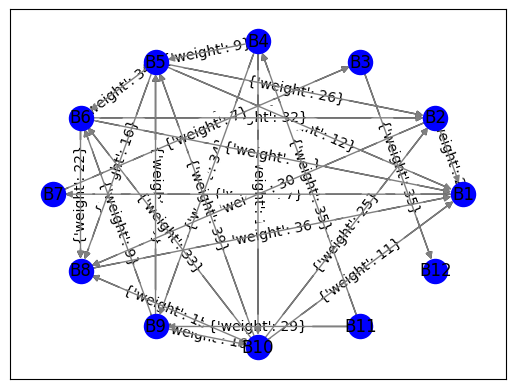

In [120]:
viz_graph(G_bleue)

In [121]:
# There might be multiple edges between two nodes
# We want to keep only the edge with the highest weight
# So that only the strongest overlap is kept between two reads

def max_overlap_graph(G):
    """For each node, keep only the output edge with higher weight

    Args:
        G (NetworkX graph): A graph with reads as nodes and adges connecting overlapping nodes

    Returns:
        NetworkX graph: A graph with reads as nodes and adges connecting overlapping nodes
    """
    # duplicate the graph
    G2 = G.copy()
    # For each node, keep only the output edge with higher weight
    for node in G2.nodes():
        edges = G2.out_edges(node, data=True)
        if len(edges) > 1:
            edges = sorted(edges, key=lambda x: x[2]['weight'], reverse=True)
            for edge in edges[1:]:
                G2.remove_edge(edge[0], edge[1])
    return G2


In [122]:
G_bleue_max = max_overlap_graph(G_bleue)
G_jaune_max = max_overlap_graph(G_jaune)
G_verte_max = max_overlap_graph(G_verte)

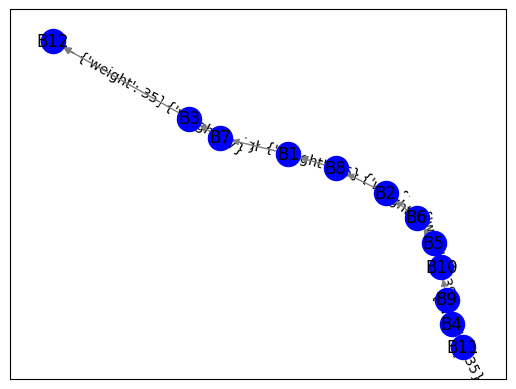

In [123]:
# Visualise the graph

viz_graph(G_bleue_max, circular = False)

# An assembly path is a sequence of reads (nodes) that are connected by edges (an overlap)

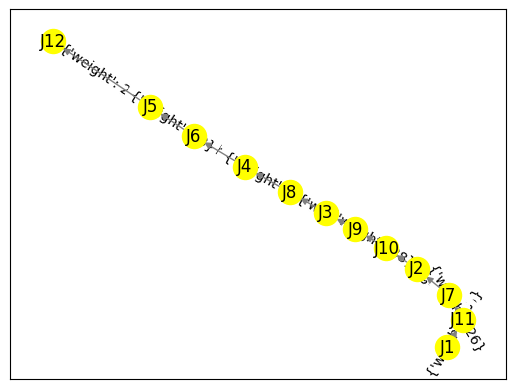

In [124]:
viz_graph(G_jaune_max, color = "yellow", circular = False)

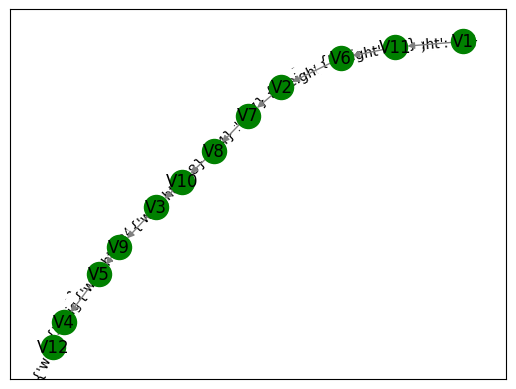

In [125]:
viz_graph(G_verte_max, color = "green", circular = False)

We have the order of the reads in the assembly path, but we don't have the sequence of the assembled contig. We can get the sequence of the assembled contig by concatenating the sequences of the reads in the assembly path, taking into account that suffixes and prefixes must not be repeated.

In [126]:
def get_assembly(G, reads_dict):
    """Concatenate the sequences of reads starting from the first node of the assembly graph

    Args:
        G (networkx graph): the assembly graph
        reads_dict (dict): initial reads of the species
    """
    # the first node has no input edges
    first_node = [node for node in G.nodes() if G.in_degree(node) == 0][0]
    # get the sequence of the first node
    assembly = reads_dict[first_node]
    # get the next node
    next_node = list(G.successors(first_node))[0]
    # loop over all nodes
    while next_node != None:
        # get the sequence of the next node
        predecessor = list(G.predecessors(next_node))[0]
        assembly += reads_dict[next_node][G.get_edge_data(predecessor,next_node)["weight"]:]
        # get the next node
        if len(list(G.successors(next_node))) == 0:
            next_node = None
        else:
            next_node = list(G.successors(next_node))[0]
    return assembly


In [127]:
genome_bleue = get_assembly(G_bleue_max, reads_bleue_named)
genome_jaune = get_assembly(G_jaune_max, reads_jaune_named)
genome_verte = get_assembly(G_verte_max, reads_verte_named)

print(f'Genome bleue: {genome_bleue}')
print(f'Genome jaune: {genome_jaune}')
print(f'Genome verte: {genome_verte}')

Genome bleue: TGACACAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA
Genome jaune: TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC
Genome verte: ATGCCTTGGACACGTAGCTAGCTAAGCTAGCCCCTAAGCTAGCCAGTTAGGTACATGCATGCATCGATCGAAATGCCTAGCTAAAGCTAAAGCTTAGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGACTCGATCGATCGTTAGCCTAGCTTTCGTTTATTCGATTCGATT


In [128]:
print(genome_jaune)
print(genomes['jaune'])

TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC
TTTGATCGATCGATCGATCGGATCGATCGATCGAATCGATCGGATCGATCGATAAATTTCCCGGGTCGATCGATCGATTCGATTCGATTCCGATCCTGAGGACTTTTAGCCTAGCTAGCTAGCTAGCTTAGCTAGCTAGCTAGGCTAGCTAGCCCTAGCAAAAGGTTTTCGATGC


In [129]:
# Check the assembly
print(f"Assembly genome bleue: {genome_bleue == genomes['bleue']}")
print(f"Assembly genome jaune: {genome_jaune == genomes['jaune']}")
print(f"Assembly genome verte: {genome_verte == genomes['verte']}")

Assembly genome bleue: True
Assembly genome jaune: True
Assembly genome verte: True


### Test the method with all reads

In [130]:
# create the assembly graph with all reads
G_all = assembly_graph(metagenome_reads_named, min_overlap = 5)
# keep only the largest overlap between two reads
G_all_max = max_overlap_graph(G_all)


read 1: 'B1' (TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT), read 2: 'B7' (CTAGCCTAGAAAACTAGGACTAAACGATCCGTAAATCCGT) - suffix of size 7: CTAGCCT
read 1: 'B2' (ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC), read 2: 'B1' (TGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTAGCCT) - suffix of size 26: TGCCATGCATCCAGTCAGCTAGGATC
read 1: 'B2' (ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC), read 2: 'B8' (AGCATGCCATGCATCCAGTCAGCTAGGATCAGGCTAGCTA) - suffix of size 30: AGCATGCCATGCATCCAGTCAGCTAGGATC
read 1: 'B2' (ACGATCCCGTAGCATGCCATGCATCCAGTCAGCTAGGATC), read 2: 'V3' (AGGATCTGACCAAGTCCCCGGGGTAGCTAGCAGTCGACTC) - suffix of size 6: AGGATC
read 1: 'B3' (AATCCGTACGATTTAGCGTACGATCCTTCCAATTATCGCT), read 2: 'B12' (GTACGATTTAGCGTACGATCCTTCCAATTATCGCTAGCTA) - suffix of size 35: GTACGATTTAGCGTACGATCCTTCCAATTATCGCT
read 1: 'B4' (CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC), read 2: 'B5' (TCGATTAGCCATAAACGATCCCGTAGCATGCCATGCATCC) - suffix of size 9: TCGATTAGC
read 1: 'B4' (CAGTCCCTAAACGGGCTAGCTAACGTACCGATCGATTAGC), read 2: 'B9' (CTAAACGG

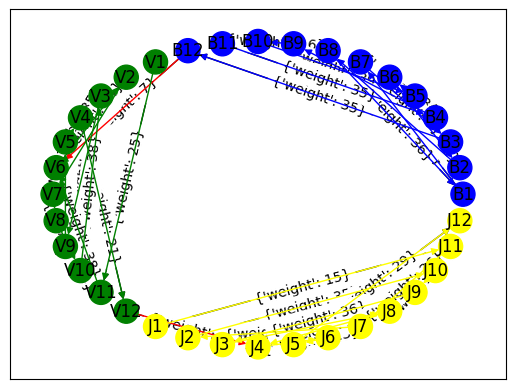

In [132]:
# Visualise the graph

node_color = []
for node in dict(G_all_max.nodes(data=True)):
    if node.startswith("B"):
        node_color.append("blue")
    elif node.startswith("V"):
        node_color.append("green")
    else:
        node_color.append("yellow")

edge_color = []        
for edge in list(G_all_max.edges(data=True)):
    if edge[0].startswith("B") and edge[1].startswith("B"):
        edge_color.append("blue")
    elif edge[0].startswith("V") and edge[1].startswith("V"):
        edge_color.append("green")
    elif edge[0].startswith("J") and edge[1].startswith("J"):
        edge_color.append("yellow")
    else:
        edge_color.append("red")

plt.figure()
pos = nx.spring_layout(G_all_max)
pos = nx.circular_layout(G_all_max)

nx.draw_networkx(G_all_max, pos=pos, node_color = node_color)

nx.draw_networkx_edge_labels(G_all_max, pos=pos)
nx.draw_networkx_edges(G_all_max,pos,width=1, edge_color=edge_color);
 
